"TITLE"

"INTRODUCTION"

- BACKROUND INFO

- QUESTION

- IDENTIFY AND DESCRIBE DATASET

PRELIMINARY EXPLORATORY DATA ANALYSIS:

In [111]:
library(tidyverse)
library(tidymodels)

- reading data into R

In [112]:
date_fruit_full_data <- read_csv("https://drive.google.com/uc?export=download&id=1jPdbQ6nzKO8h9KTi7R6VKyExp2o7Ry5P")

Rows: 898 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (34): AREA, PERIMETER, MAJOR_AXIS, MINOR_AXIS, ECCENTRICITY, EQDIASQ, SO...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


- Selecting only necessary data (predictors and class fo

In [113]:
date_fruit_data <- select(date_fruit_full_data, "Class", "AREA", "PERIMETER", "CONVEX_AREA", "MAJOR_AXIS", "MINOR_AXIS")

- Splitting the training set and testing set

In [107]:
date_fruit_split <- initial_split(date_fruit_data, prop = 0.75, strata = Class)
date_fruit_train <- training(date_fruit_split)
date_fruit_test <- testing(date_fruit_split)

date_fruit_train

Class,AREA,PERIMETER,CONVEX_AREA,MAJOR_AXIS,MINOR_AXIS
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BERHI,408953,2326.693,410036,840.1821,622.0076
BERHI,342155,2151.896,345474,760.6585,575.3604
BERHI,408220,2317.669,411229,769.1027,681.1285
⋮,⋮,⋮,⋮,⋮,⋮
SOGAY,255403,1925.365,261028,691.8453,477.1796
SOGAY,254330,1926.736,256255,747.4943,435.6219
SOGAY,343792,2289.272,351472,823.8438,534.7757


- Summarizing training data to get the mean for the predictors, showing how the mean of predictors vary for each class.

In [108]:
date_fruit_mean <- date_fruit_train |> 
group_by(Class) |> 
summarize(
    mean_area = mean(AREA),
    mean_perimetere = mean(PERIMETER),
    mean_convex_area = mean(CONVEX_AREA),
    mean_major = mean(MAJOR_AXIS),
    mean_minor = mean(MINOR_AXIS))

date_fruit_summarized

Class,mean_area,mean_perimetere,mean_convex_area,mean_major,mean_minor
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BERHI,405213.4,2321.505,407666.2,815.3703,634.6560
DEGLET,233743.4,1831.442,237428.9,680.2224,440.2732
DOKOL,145147.4,1436.321,147027.0,537.8438,342.9496
⋮,⋮,⋮,⋮,⋮,⋮
ROTANA,387115.9,2376.310,394846.1,832.4755,599.8809
SAFAVI,334367.8,2329.186,343399.9,881.3856,488.4889
SOGAY,286873.0,2051.277,295203.7,755.9785,492.6769


- Making visualization to show how predictors will work with the different classes.

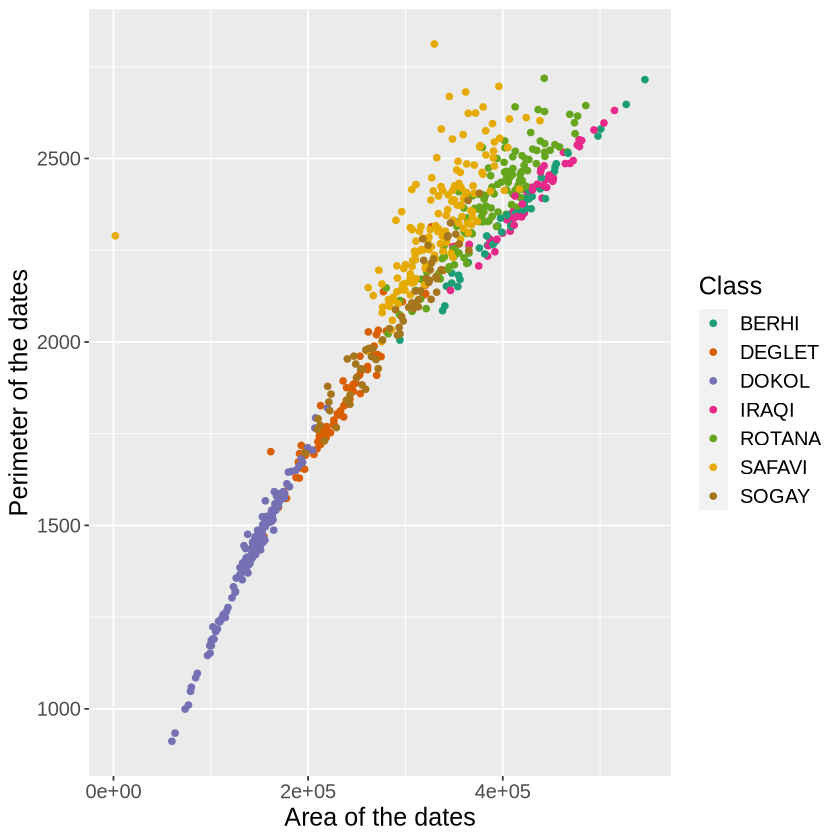

In [109]:
library(scales)

perimeter_vs_area <- ggplot(date_fruit_train, aes(x = AREA,
                     y = PERIMETER,
                     color = Class)) +
  geom_point() +
  xlab("Area of the dates") +
  ylab("Perimeter of the dates") +
  theme(text = element_text(size = 15),
        legend.direction = "vertical") +
  scale_color_brewer(palette = "Dark2") 

perimeter_vs_area

- Plotting major axis and minor axis, showing trends making them a good predictor as well

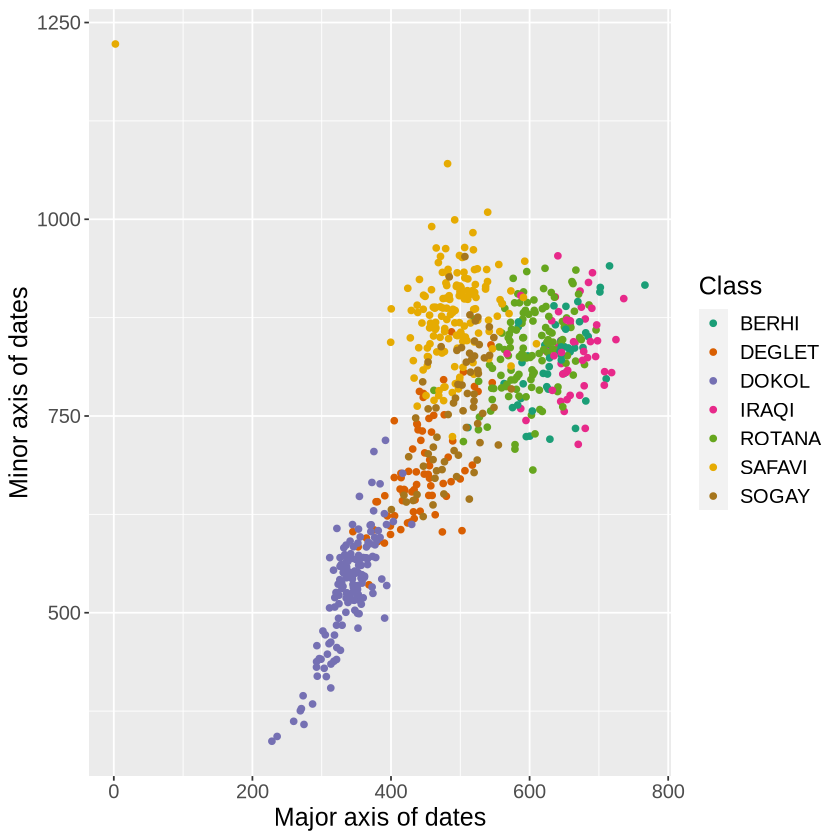

In [110]:
major_vs_minor <- ggplot(date_fruit_train, aes(x = MINOR_AXIS,
                     y = MAJOR_AXIS,
                     color = Class)) +
  geom_point() +
  xlab("Major axis of dates") +
  ylab("Minor axis of dates") +
  theme(text = element_text(size = 15),
        legend.direction = "vertical") +
  scale_color_brewer(palette = "Dark2")

major_vs_minor

- METHODS

- EXPECTED OUTCOMES AND SIGNIFICANCE